<a href="https://colab.research.google.com/github/minhaz1172/Deep-Learning/blob/main/transfer_learning(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dataset from kaggle**

# upload kaggle.json api in colab

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minhaz1172","key":"ae7abd8510b81a9fa7badffec1b23486"}'}

# **Move and set permissson**

In [2]:
import os
import zipfile

# Make directory and move kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set proper permissions
!chmod 600 ~/.kaggle/kaggle.json


# **install kaggle package**

In [3]:
!pip install -q kaggle


# **Find and download the dataset**

In [4]:

!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.04G/1.06G [00:07<00:00, 100MB/s]
100% 1.06G/1.06G [00:07<00:00, 159MB/s]


# unzip the dataset

In [5]:
# Unzip the dataset (replace the file name if needed)
!unzip -q dogs-vs-cats

# import necessary Liabraries

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# **making a class of vgg16**
#  Load the VGG16 model with pretrained ImageNet weights.
# We exclude the top (classification) layers(output layers) since we'll be adding our own.

In [7]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Freeze the base model so that its weights do not get updated during the initial training phase**

In [8]:
base_model.trainable=False

In [9]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# Define image dimension and batch size for our image generatio

In [10]:
img_height,img_width=224,224 ## VGG16 expects 224x224 images
batch_size=32  # number of images per gradient update

# Create data generation with augmentation

In [11]:
train_datagen=ImageDataGenerator(
    rescale=1./255, ## Normalize pixel values to [0,1]
    rotation_range=40,  # Randomly rotate images up to 40 degrees
    width_shift_range=0.2, # Randomly shift images horizontally by 20%
    height_shift_range=0.2, # Randomly shift images vertically by 20%
    zoom_range=0.2, #  # Randomly zoom in on images
     horizontal_flip=True, #  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformations

)


# create an imageDatagenerator for validation without augmentation(without rescaling

In [12]:
val_datagen=ImageDataGenerator(rescale=1./255)

# **Define the directory paths for training and validation data in your Colab folder**

In [13]:
train_dir='/content/train'
val_dir='/content/test'

# **define the directory path for training and validation data which is in my colab folder**

# Create a data generator that reads images from the training directory,
# applies augmentation, and resizes them to the required dimensions.

In [14]:
train_generator=train_datagen.flow_from_directory(
    train_dir, # directory with training images
    target_size=(img_height,img_width), # resize image with 224 by 224
    batch_size=batch_size, #number
    class_mode='categorical'
)


Found 20000 images belonging to 2 classes.


# create a data generator for validation data(no augmentation is applied)

In [15]:
validation_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5000 images belonging to 2 classes.


# **COMPILE THE MODEL**

# Determine the number of classes from the training generator.

In [16]:
num_classes=len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

Number of classes: 2


# Create a sequential mode and add layers

In [17]:
model=Sequential()
model.add(base_model)  # Add the VGG16 convolutional base.
model.add(Flatten()) # Flatten the 3D feature maps to 1D feature vectors.
model.add(Dense(256,activation='relu')) # add a fully connected dense layer
model.add(Dropout(0.5)) # add dropout for regularization to help prevent overfitting.
model.add(Dense(num_classes,activation='softmax')) # add a final output layer



# compile the model

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Set the number of epochs for the initial training phase.


In [19]:
initial_epochs = 10

# **Train the model using the training generator and validate on the validation generator**

In [20]:
history=model.fit(
    train_generator,
    steps_per_epoch = min(500 // batch_size, train_generator.samples // batch_size), # takin oly 500 images to train
    epochs=initial_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples //batch_size
                  )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5206 - loss: 2.8145 - val_accuracy: 0.8037 - val_loss: 0.4246
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6536 - loss: 0.9954 - val_accuracy: 0.8219 - val_loss: 0.3984
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6512 - loss: 0.6080 - val_accuracy: 0.8351 - val_loss: 0.4574
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7648 - loss: 0.5163 - val_accuracy: 0.8592 - val_loss: 0.3531
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7453 - loss: 0.5116 - val_accuracy: 0.8804 - val_loss: 0.3108
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7868 - loss: 0.4779 - val_accuracy: 0.8902 - val_loss: 0.2880
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8043 - loss: 0.4091 - val_accuracy: 0.8904 - val_loss: 0.2703
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8187 - loss: 0.3833 - val_accuracy: 0.8774 - val_loss:

# FINE-TUNE THE MODEL (UNFREEZE SOME LAYERS OF VGG16)
# Unfreeze the entire base model to prepare for fine-tuning.

In [21]:
base_model.trainable= True

# For fine-tuning, we freeze the earlier layers and only train the last few layers of VGG16.
# This prevents losing the general features learned from ImageNet.

In [22]:
# as vgg16 has 16 convlayers,3 fully conneted layer
fine_tune_at=len(base_model.layers)-4 ## Unfreeze the last 4 layers only.
for layer in base_model.layers[:fine_tune_at]:      # freeze the layers before last 4 four layers
  layer.trainable=False

# Recompile the model with a very low learning rate to avoid large weight updates during fine-tuning.

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

#set the number of epochs for fine tunning


In [25]:
fine_tune_epochs=10
total_epochs=initial_epochs+fine_tune_epochs

# continue the training model with unfrozen layer

In [27]:
history_fine=model.fit(
    train_generator,
    steps_per_epoch=min(500 // batch_size,train_generator.samples//batch_size),
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],  # Start fine-tuning where the initial training left off.
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7154 - loss: 0.6510 - val_accuracy: 0.8522 - val_loss: 0.3262
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8121 - loss: 0.4147 - val_accuracy: 0.9189 - val_loss: 0.2039
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8789 - loss: 0.2885 - val_accuracy: 0.8906 - val_loss: 0.2365
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8899 - loss: 0.2868 - val_accuracy: 0.9383 - val_loss: 0.1540
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8894 - loss: 0.2432 - val_accuracy: 0.9103 - val_loss: 0.2626
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8880 - loss: 0.3073 - val_accuracy: 0.9385 - val_loss: 0.1480
Epoch 16/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9304 - loss: 0.1836 - val_accuracy: 0.9433 - val_loss: 0.1457
Epoch 17/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8935 - loss: 0.2313 - val_accuracy: 0.9483 - v

#  Combine the loss records from the initial training and fine-tuning into one list for plotting.

In [28]:
combined_loss=history.history['loss']+history_fine.history['loss']
combined_val_loss=history.history['val_loss']+history_fine.history['val_loss']

# visualize the training loss and validation loss

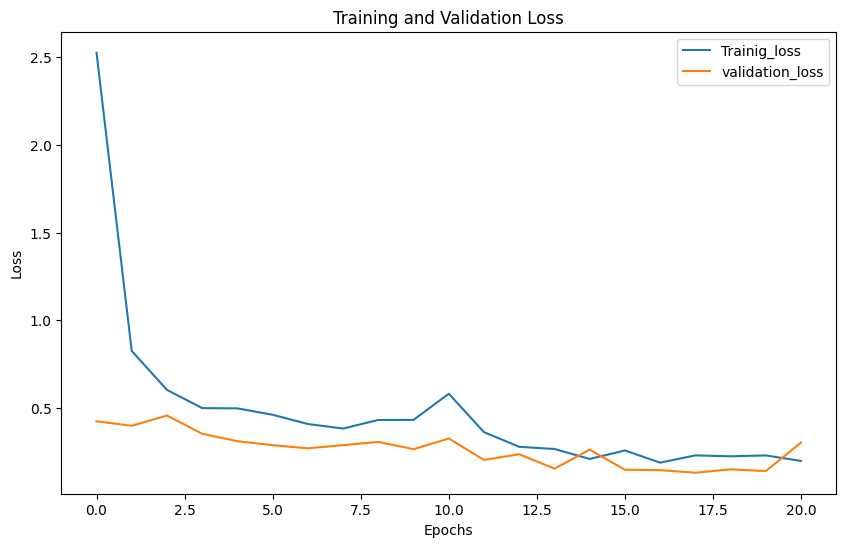

In [29]:
plt.figure(figsize=(10,6))
plt.plot(combined_loss,label='Trainig_loss')
plt.plot(combined_val_loss,label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the performance of the model on the validation set

In [30]:
loss,accuracy=model.evaluate(validation_generator,steps=validation_generator.samples//batch_size)
print("validation loss",loss)
print("validation accuracy",accuracy)

156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 173ms/step - accuracy: 0.8970 - loss: 0.2859
validation loss 0.3022824823856354
validation accuracy 0.8942307829856873
